### Matrix and Data
##### [Hiroyuki Chihara](https://fiomfd.github.io/) (University of the Ryukyus, Okinawa Island, Japan)

1. Data described by matrices
2. Singular value decomposition and low rank approximation
3. Wavelet decomposition with the Haar wavelet and image processing

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False
import math
import numpy as np
import csv
import pprint
import pandas as pd
import requests
import io
import cv2
import pywt
import imageio.v2 as imageio
import requests
from io import BytesIO
from ipywidgets import interact, FloatSlider
from scipy.special import gammaln
from PIL import Image
from IPython.display import Image, display
from matplotlib.animation import FuncAnimation, PillowWriter
from PIL import Image as PILImage 
from IPython.display import Image as IPyImage, display
from ipywidgets import interact, IntSlider

### 1. Data described by matrices

#### 1-1. Data matrices

Below is a list of height and weight data for 100 people, which can be considered as a $100\times2$ matrix. In general, when the number of individuals is $N$ and each individual has $p$ types of data, the data list can be expressed as a matrix.

In [2]:
rng = np.random.default_rng()
xx = rng.integers(1550, 1951, size=100) / 10.0
XX = np.c_[np.ones(100), xx]
yy = (xx**2) * (rng.integers(160, 401, size=100) / 100000.0)
yy = np.round(yy, 1)
bb = np.linalg.lstsq(XX, yy, rcond=None)[0] 
tt = np.arange(155, 196) 
# zz = [ones(length(tt)) tt] * bb
zz = np.c_[np.ones(tt.size), tt] @ bb 
ZZ = np.c_[xx, yy] 

df = pd.DataFrame({
    "height": xx,
    "weight": yy
})
print(df);

    height  weight
0    186.2   132.8
1    156.3    44.0
2    170.2    46.9
3    158.4    66.2
4    179.6    96.1
..     ...     ...
95   182.0   109.6
96   157.0    62.4
97   160.4    44.8
98   168.9    45.6
99   171.9   100.5

[100 rows x 2 columns]


Each individual's data can be plotted as a point on a plane with height on the horizontal axis and weight on the vertical axis. This is called a scatter plot. By using pseudoinverse or singular value decomposition in linear algebra, it is possible to obtain the best line that shows the relationship between height and weight using linear regression (the least squares method).

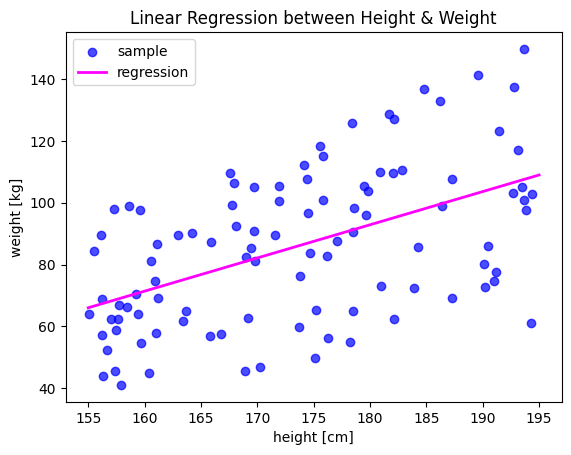

In [3]:
plt.scatter(xx, yy, 
            label="sample", 
            color="blue", 
            alpha=0.7)

plt.plot(tt, zz, 
         linewidth=2, 
         label="regression", 
         color="magenta")

plt.xlabel("height [cm]")
plt.ylabel("weight [kg]")
plt.title("Linear Regression between Height & Weight")
plt.grid(False)  
plt.legend()
plt.show()

### 1-2. Grayscale images
A grayscale image is a matrix in which each small square (pixel) has an integer between $0$ and $255$, or a real number between $0$ and $1$ obtained by dividing the integer by $255$. The integer $0$ represents black and the integer $255$ represents white. The number represents the intensity of the color, and the higher the number, the stronger the color. For example, the matrix

$\begin{bmatrix}
0 & 15  & 30  & 45 & 60 & 75
\\ 
90 & 105 & 120  & 135  & 150 & 165
\\ 
180 & 195  & 210  & 225 & 240 & 255
\end{bmatrix}$

becomes the following grayscale image:

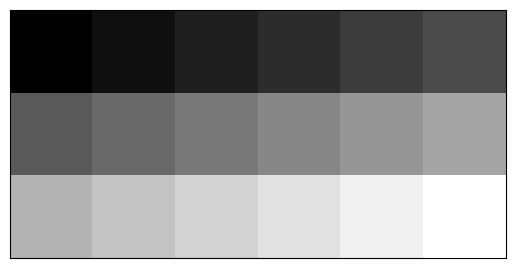

In [4]:
A=np.array([[0,   15,  30,  45,  60,  75], 
            [90,  105, 120, 135, 150, 165],
            [180, 195, 210, 225, 240, 255]],
             dtype=np.uint8);

plt.imshow(A, cmap="gray", vmin=0, vmax=255)
#plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

### 1-3. RGB images

An RGB image is created by combining three matrices of grayscale image data of the same size, each of which is colored with the three primary colors red, green, and blue. The following shows three $16\times16$ matrices generated by the random numbers created by a programming language, and the RGB image by combining the triplet.


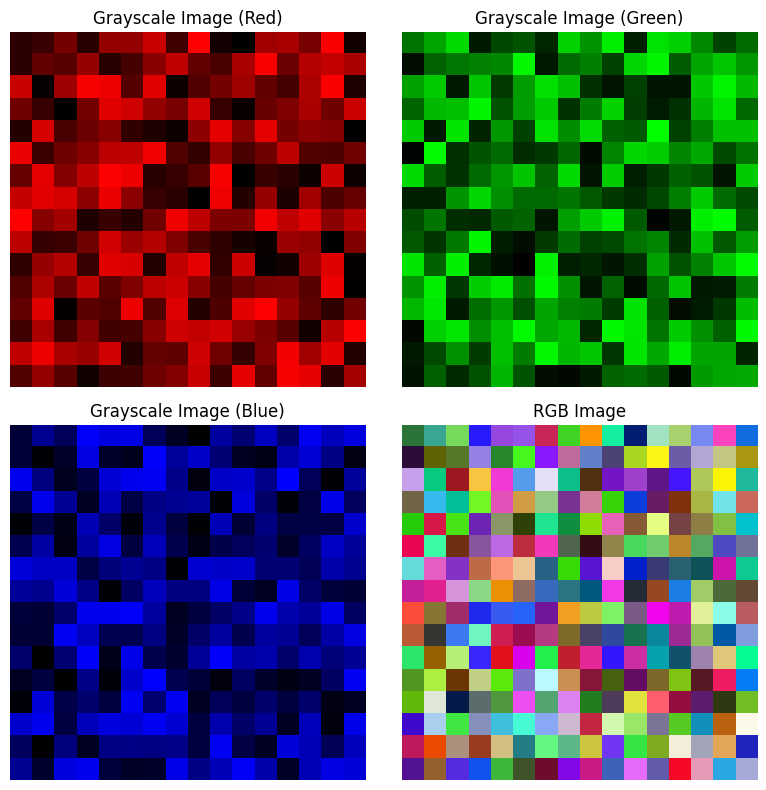

In [5]:
L1 = 4
n1  = 2**L1

RRR = np.random.rand(n1, n1)
GGG = np.random.rand(n1, n1)
BBB = np.random.rand(n1, n1)

imgRGB = np.dstack([RRR, GGG, BBB])

ZZZ = np.zeros((n1, n1))
imgR = np.dstack([RRR, ZZZ, ZZZ])
imgG = np.dstack([ZZZ, GGG, ZZZ])
imgB = np.dstack([ZZZ, ZZZ, BBB])

# 2×2 に並べて表示
fig, axs = plt.subplots(2, 2, figsize=(8,8))

axs[0,0].imshow(imgR)
axs[0,0].set_title("Grayscale Image (Red)")
axs[0,0].axis("off")

axs[0,1].imshow(imgG)
axs[0,1].set_title("Grayscale Image (Green)")
axs[0,1].axis("off")

axs[1,0].imshow(imgB)
axs[1,0].set_title("Grayscale Image (Blue)")
axs[1,0].axis("off")

axs[1,1].imshow(imgRGB)
axs[1,1].set_title("RGB Image")
axs[1,1].axis("off")

plt.tight_layout()
plt.show()

### 1-4. Grayscale movies
If multiple grayscale images are displayed in succession, we have a grayscale movie. Here, we will generate 100 randomly generated matrices of and animate them.

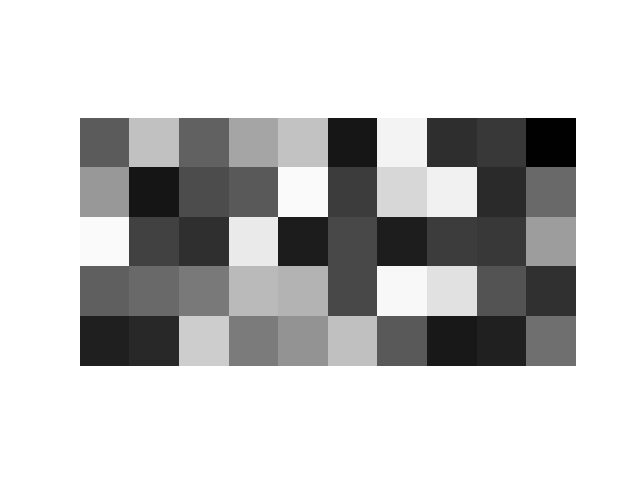

In [6]:
Agray = np.random.rand(5, 10, 100)

fig, ax = plt.subplots()
im = ax.imshow(Agray[:, :, 0], cmap="gray", vmin=0, vmax=1)
ax.axis("off")

def update(frame):
    im.set_array(Agray[:, :, frame])
    return [im]

anim = FuncAnimation(fig, update, frames=Agray.shape[2], interval=333, blit=True)

anim.save("grayscale_animation.gif", writer=PillowWriter(fps=3))
plt.close()

Image(filename="grayscale_animation.gif")

### 1-5. RGB movies

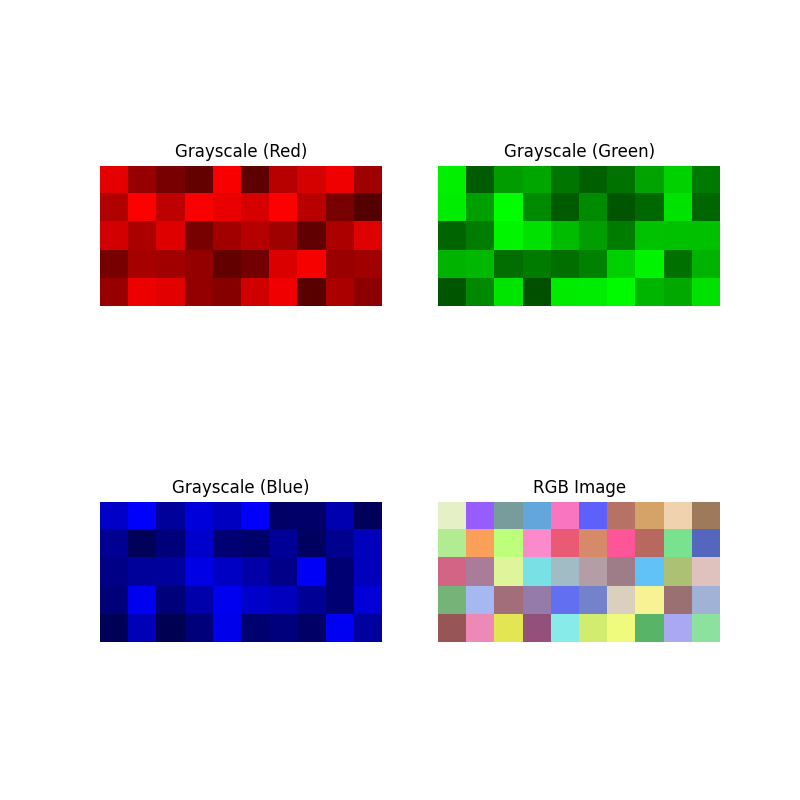

In [7]:
H, W, T = 5, 10, 100
rng = np.random.default_rng(0)
R = rng.integers(80, 256, size=(H, W, T)) / 255.0
G = rng.integers(80, 256, size=(H, W, T)) / 255.0
B = rng.integers(80, 256, size=(H, W, T)) / 255.0
Z = np.zeros((H, W), dtype=float)

def frame_images(k):
    imgR   = np.dstack([R[:, :, k], Z, Z])
    imgG   = np.dstack([Z, G[:, :, k], Z])
    imgB   = np.dstack([Z, Z, B[:, :, k]])
    imgRGB = np.dstack([R[:, :, k], G[:, :, k], B[:, :, k]])
    return imgR, imgG, imgB, imgRGB

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
titles = ["Grayscale (Red)", "Grayscale (Green)", "Grayscale (Blue)", "RGB Image"]
for ax, t in zip(axs.ravel(), titles):
    ax.set_title(t)
    ax.axis("off")

imgR0, imgG0, imgB0, imgRGB0 = frame_images(0)
artists = [
    axs[0,0].imshow(imgR0,   vmin=0, vmax=1),
    axs[0,1].imshow(imgG0,   vmin=0, vmax=1),
    axs[1,0].imshow(imgB0,   vmin=0, vmax=1),
    axs[1,1].imshow(imgRGB0, vmin=0, vmax=1),
]

def update(k):
    imgR, imgG, imgB, imgRGB = frame_images(k)
    artists[0].set_data(imgR)
    artists[1].set_data(imgG)
    artists[2].set_data(imgB)
    artists[3].set_data(imgRGB)
    return artists

anim = FuncAnimation(fig, update, frames=T, interval=333, blit=False)
anim.save("rgb_animation.gif", writer=PillowWriter(fps=3))
plt.close(fig)

display(Image(filename="rgb_animation.gif"))

### 2. Singular value decomposition and low rank approximation
In general an $m{\times}n$ matrix $A=\begin{bmatrix}\vec{a}_1 & \dotsb & \vec{a}_n \end{bmatrix}$ has a specific nonnegative integer which is called as the rank of  $A$ defined by 

$r
:=
\operatorname{dim}\bigl(
\{
A\vec{x}
=
x_1\vec{a}_1+\dotsb+x_n\vec{a}_n 
\ \vert \ 
\vec{x} \in \mathbb{R}^n
\}
\bigr).$ 

It follows that $1 \leqq r \leqq \min\{m,n\}$ unless all the entries of $A$ are zero.  
It is known that there exist  

$\sigma_1 \geqq \dotsb \geqq \sigma_r>0,
\quad
\vec{u}_1,\dotsc,\vec{u}_r \in \mathbb{R}^m,
\quad
\vec{v}_1,\dotsc,\vec{v}_r \in \mathbb{R}^n$

such that we have 

$A=\displaystyle\sum_{j=1}^r\sigma_j\vec{u}_j\vec{v}_j^T.$

Set 

$A_k:=\displaystyle\sum_{j=1}^k\sigma_j\vec{u}_j\vec{v}_j^T, \quad k=1,\dotsc,r.$

It is known that the rank of $A_k$ is $k$ and closest to $A$ among all the $m{\times}n$ matrices of rank $k$, that is, $A_k$ is the best approximation of $A$ among all the $m{\times}n$ matrices of rank $k$.   

We compute $384\times512\times3$ RGB image of fried noodle at a canteen, City University of Hong Kong: 

In [5]:
# If you use CityU.jpg at the same holder, comment out the following:
#I = PILImage.open("./CityU.jpg").convert("RGB") 

# Other wise, use CityU.jpg at the GitHub:
url = "https://raw.githubusercontent.com/fiomfd/ATCM2025/main/data/CityU.jpg"
response = requests.get(url)
I = PILImage.open(BytesIO(response.content))

new_size = (I.width // 8, I.height // 8)
X = I.resize(new_size, resample=PILImage.BICUBIC)
X = np.asarray(X, dtype=float) / 255.0  
p, q = X.shape[:2]
L = 7 
R = X[:, :, 0]
G = X[:, :, 1]
B = X[:, :, 2]

def svd3(A):
    U, S, VT = np.linalg.svd(A, full_matrices=False)   # A ≈ U @ diag(S) @ VT
    return U, S, VT

RU, RS, RVT = svd3(R)
GU, GS, GVT = svd3(G)
BU, BS, BVT = svd3(B)

rank = 100
rank = min(rank, min(p, q)) 

DR = np.zeros((p, q, rank), dtype=float)
DG = np.zeros((p, q, rank), dtype=float)
DB = np.zeros((p, q, rank), dtype=float)

for k in range(1, rank + 1):
    DR[:, :, k-1] = (RU[:, :k] * RS[:k]) @ RVT[:k, :]
    DG[:, :, k-1] = (GU[:, :k] * GS[:k]) @ GVT[:k, :]
    DB[:, :, k-1] = (BU[:, :k] * BS[:k]) @ BVT[:k, :]

p, q = R.shape
rank = DR.shape[2]

T = rank + 16                       
Y = np.zeros((T, p, q, 3), float)   

Y[0:4, :, :, 0] = R
Y[0:4, :, :, 1] = G
Y[0:4, :, :, 2] = B

Y[8:8+rank, :, :, 0] = np.transpose(DR, (2, 0, 1)) 
Y[8:8+rank, :, :, 1] = np.transpose(DG, (2, 0, 1))
Y[8:8+rank, :, :, 2] = np.transpose(DB, (2, 0, 1))

Y[rank+12:rank+16, :, :, 0] = R
Y[rank+12:rank+16, :, :, 1] = G
Y[rank+12:rank+16, :, :, 2] = B

W = np.stack([
    np.transpose(DR, (2, 0, 1)),  # (rank, p, q)
    np.transpose(DG, (2, 0, 1)),
    np.transpose(DB, (2, 0, 1))
], axis=-1)  # -> (rank, p, q, 3)

def show_rank(r):
    approx = np.clip(W[r-1], 0, 1)  # そのまま (p, q, 3)
    fig, axes = plt.subplots(1, 2, figsize=(8,4))
    axes[0].imshow(approx, vmin=0, vmax=1)
    axes[0].set_title(f"approximation rank = {r}")
    axes[0].axis("off")

    axes[1].imshow(np.clip(X, 0, 1), vmin=0, vmax=1)
    axes[1].set_title("original RGB image")
    axes[1].axis("off")
    plt.tight_layout(); plt.show()

interact(show_rank, r=IntSlider(min=1, max=W.shape[0], step=1, value=1, description="rank"));

interactive(children=(IntSlider(value=1, description='rank', min=1), Output()), _dom_classes=('widget-interact…

### 3. Wavelet decomposition and image processing

### 3-1. The Haar wavelet
The discrete wavelet is a pair of orthonomal two vectors $\vec{u}$ and $\vec{v}$ satisfying some condition, and the most typical example of the discrete wavelets is the Haar wavelet. They are very simple vectors: 

$\vec{u}
=
\dfrac{1}{\sqrt{2}}
\begin{bmatrix}
1
\\
1
\\
0
\\
\vdots
\\
0 
\end{bmatrix}, 
\quad
\vec{v}
=
\dfrac{1}{\sqrt{2}}
\begin{bmatrix}
1
\\
-1
\\
0
\\
\vdots
\\
0 
\end{bmatrix}
\in\mathbb{R}^{N},$

Roughly speaking the discrete wavelet transform by the Haar wavelet is to take averages of neighboring elements. The elements of a vector are transformed  to the average of neighboring two elements, and the elements of a matrix are converted to the average of neighboring 2 by 2 elements. The following examples show the outcomes of repeating the discere wavelet tranform twice: 

$\vec{a}_0
=
\begin{bmatrix}
1 \\ 3 \\ 5 \\ 7 
\end{bmatrix}
\mapsto 
\vec{a}_1
=
\begin{bmatrix}
2 \\ 2 \\ 6 \\ 6 
\end{bmatrix}
\mapsto 
\vec{a}_2
=
\begin{bmatrix}
4 \\ 4 \\ 4 \\ 4 
\end{bmatrix}$

$A_0
=
\begin{bmatrix}
0 & 2 & 4 & 6
\\ 
8 & 10 & 12 & 14 
\\ 
16 & 18 & 20 & 22
\\ 
24 & 26 & 28 & 30
\end{bmatrix}
\mapsto 
A_1
=
\begin{bmatrix}
5 & 5 & 9 & 9
\\ 
5 & 5 & 9 & 9 
\\ 
21 & 21 & 25 & 25
\\ 
21 & 21 & 25 & 25
\end{bmatrix}
\mapsto 
A_2
=
\begin{bmatrix}
15 & 15 & 15 & 15
\\ 
15 & 15 & 15 & 15 
\\ 
15 & 15 & 15 & 15
\\ 
15 & 15 & 15 & 15
\end{bmatrix}.$


The output such as $\vec{a}_\ell$ and $A_\ell$ of $\ell$ times operations is said to be the approximation part of level $\ell$, and the remainder term such as $\vec{a}_0-\vec{a}_\ell$ and $A_0-A_\ell$ is called the detail part of level $\ell$. 

We shall observe the wavelet decomposition of image data using the Haar wavelet.

### 3-2. $8\times8$ grayscale image

In [9]:
G0 = np.array([
 [  0,  4,  8, 12, 16, 20, 24, 28],
 [ 32, 36, 40, 44, 48, 52, 56, 60],
 [ 64, 68, 72, 76, 80, 84, 88, 92],
 [ 96,100,104,108,112,116,120,124],
 [128,132,136,140,144,148,152,156],
 [160,164,168,172,176,180,184,188],
 [192,196,200,204,208,212,216,220],
 [224,228,232,236,240,244,248,252]
], dtype=float) / 255.0

L0 = 3                        
wave = 'haar'
mode = 'periodization'       

coeffs_levels = [pywt.wavedec2(G0, wave, level=l, mode=mode) for l in range(1, L0+1)]

def reconstruct_approx_detail(l):
    if l == 0:
        return G0, np.zeros_like(G0)

    coeffs = coeffs_levels[l-1]           
    cA = coeffs[0]
    details = coeffs[1:]                  

    zeros_details = [tuple(np.zeros_like(a) for a in d) for d in details]
    approx = pywt.waverec2([cA, *zeros_details], wave, mode=mode)

    zero_cA = np.zeros_like(cA)
    detail = pywt.waverec2([zero_cA, *details], wave, mode=mode)

    H, W = G0.shape
    approx = approx[:H, :W]
    detail = detail[:H, :W]
    return approx, detail

def show_level(l0):
    approx, detail = reconstruct_approx_detail(l0)

    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    for ax in axes: ax.axis('off')

    axes[0].imshow(G0, cmap='gray', vmin=0, vmax=1)
    axes[0].set_title("original")

    axes[1].imshow(approx, cmap='gray', vmin=0, vmax=1)
    axes[1].set_title(f"approx (level {l0})")

    axes[2].imshow(detail, cmap='gray', vmin=0, vmax=1)
    axes[2].set_title(f"detail (level {l0})")

    plt.tight_layout(); plt.show()

interact(show_level, l0=IntSlider(min=0, max=L0, step=1, value=0, description="Level"));

interactive(children=(IntSlider(value=0, description='Level', max=3), Output()), _dom_classes=('widget-interac…

### 3-3. $16\times16$ RGB image created by random number

In [10]:
N = RRR.shape[0]
assert RRR.shape == (N, N) and GGG.shape == (N, N) and BBB.shape == (N, N)
L1 = 4
wave = 'haar'
mode = 'periodization' 

RXII = np.zeros((N, N, L1), float)
GXII = np.zeros((N, N, L1), float)
BXII = np.zeros((N, N, L1), float)

R_slices = []
G_slices = []
B_slices = []

for l in range(1, L1+1):
    # wavedec2: [cA_l, (cH_l,cV_l,cD_l), ..., (cH1,cV1,cD1)]
    R_coeffs = pywt.wavedec2(RRR, wave, level=l, mode=mode)
    G_coeffs = pywt.wavedec2(GGG, wave, level=l, mode=mode)
    B_coeffs = pywt.wavedec2(BBB, wave, level=l, mode=mode)

    R_arr, R_sl = pywt.coeffs_to_array(R_coeffs)
    G_arr, G_sl = pywt.coeffs_to_array(G_coeffs)
    B_arr, B_sl = pywt.coeffs_to_array(B_coeffs)

    RXII[:, :, l-1] = R_arr
    GXII[:, :, l-1] = G_arr
    BXII[:, :, l-1] = B_arr

    R_slices.append(R_sl)
    G_slices.append(G_sl)
    B_slices.append(B_sl)

RXIIapprox = np.zeros_like(RXII)
GXIIapprox = np.zeros_like(GXII)
BXIIapprox = np.zeros_like(BXII)

for l in range(1, L1+1):
    sA = R_slices[l-1][0]  
    RXIIapprox[:, :, l-1][sA] = RXII[:, :, l-1][sA]
    sA = G_slices[l-1][0]
    GXIIapprox[:, :, l-1][sA] = GXII[:, :, l-1][sA]
    sA = B_slices[l-1][0]
    BXIIapprox[:, :, l-1][sA] = BXII[:, :, l-1][sA]

RXIIdetail = RXII - RXIIapprox
GXIIdetail = GXII - GXIIapprox
BXIIdetail = BXII - BXIIapprox

def reconstruct_from_array(arr2d, slices, wave=wave, mode=mode):
    coeffs = pywt.array_to_coeffs(arr2d, slices, output_format='wavedec2')
    rec = pywt.waverec2(coeffs, wave, mode=mode)
    return rec[:N, :N]  # 念のためトリム

RYIIapprox = np.zeros((N, N, L1), float)
RYIIdetail = np.zeros((N, N, L1), float)
GYIIapprox = np.zeros((N, N, L1), float)
GYIIdetail = np.zeros((N, N, L1), float)
BYIIapprox = np.zeros((N, N, L1), float)
BYIIdetail = np.zeros((N, N, L1), float)

for l in range(1, L1+1):
    RYIIapprox[:, :, l-1] = reconstruct_from_array(RXIIapprox[:, :, l-1], R_slices[l-1])
    RYIIdetail[:, :, l-1] = reconstruct_from_array(RXIIdetail[:, :, l-1], R_slices[l-1])

    GYIIapprox[:, :, l-1] = reconstruct_from_array(GXIIapprox[:, :, l-1], G_slices[l-1])
    GYIIdetail[:, :, l-1] = reconstruct_from_array(GXIIdetail[:, :, l-1], G_slices[l-1])

    BYIIapprox[:, :, l-1] = reconstruct_from_array(BXIIapprox[:, :, l-1], B_slices[l-1])
    BYIIdetail[:, :, l-1] = reconstruct_from_array(BXIIdetail[:, :, l-1], B_slices[l-1])

# Julia の ZIIapprox, ZIIdetail (3, N, N, L1+1) に相当
ZIIapprox = np.zeros((L1+1, N, N, 3), float)
ZIIdetail = np.zeros((L1+1, N, N, 3), float)

ZIIapprox[0, :, :, 0] = RRR
ZIIapprox[0, :, :, 1] = GGG
ZIIapprox[0, :, :, 2] = BBB

for l in range(1, L1+1):
    ZIIapprox[l, :, :, 0] = RYIIapprox[:, :, l-1]
    ZIIapprox[l, :, :, 1] = GYIIapprox[:, :, l-1]
    ZIIapprox[l, :, :, 2] = BYIIapprox[:, :, l-1]

    ZIIdetail[l, :, :, 0] = RYIIdetail[:, :, l-1]
    ZIIdetail[l, :, :, 1] = GYIIdetail[:, :, l-1]
    ZIIdetail[l, :, :, 2] = BYIIdetail[:, :, l-1]

ZIIapprox = np.clip(ZIIapprox, 0, 1)
ZIIdetail = np.clip(ZIIdetail, 0, 1)

def show_level(l1):
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    for ax in axes: ax.axis('off')

    axes[0].imshow(np.dstack([RRR, GGG, BBB]), vmin=0, vmax=1)
    axes[0].set_title("Original")

    axes[1].imshow(ZIIapprox[l1], vmin=0, vmax=1)
    axes[1].set_title(f"Approx (level {l1})")

    axes[2].imshow(ZIIdetail[l1], vmin=0, vmax=1)
    axes[2].set_title(f"Detail (level {l1})")

    plt.tight_layout(); plt.show()

interact(show_level, l1=IntSlider(min=0, max=L1, step=1, value=0, description="Level"));

interactive(children=(IntSlider(value=0, description='Level', max=4), Output()), _dom_classes=('widget-interac…

### 3-4. $384\times512$ RGB image
fried noodle at a canteen, City University of Hong Kong

 $384=2^7\times3$, $512=2^9$

In [6]:
p, q = R.shape
L = min(7, int(np.floor(np.log2(min(p, q)))))  
wave = 'haar'
mode = 'periodization'  

A = np.stack([R, G, B], axis=0)

XR = np.zeros((p, q, L), float)
XG = np.zeros((p, q, L), float)
XB = np.zeros((p, q, L), float)
R_slices, G_slices, B_slices = [], [], []  

for l in range(1, L+1):
    Rc = pywt.wavedec2(R, wave, level=l, mode=mode)
    Gc = pywt.wavedec2(G, wave, level=l, mode=mode)
    Bc = pywt.wavedec2(B, wave, level=l, mode=mode)

    Rarr, Rsl = pywt.coeffs_to_array(Rc)
    Garr, Gsl = pywt.coeffs_to_array(Gc)
    Barr, Bsl = pywt.coeffs_to_array(Bc)

    XR[:, :, l-1] = Rarr
    XG[:, :, l-1] = Garr
    XB[:, :, l-1] = Barr
    R_slices.append(Rsl); G_slices.append(Gsl); B_slices.append(Bsl)

XRapprox = np.zeros_like(XR)
XGapprox = np.zeros_like(XG)
XBapprox = np.zeros_like(XB)

for l in range(1, L+1):
    XRapprox[:, :, l-1][R_slices[l-1][0]] = XR[:, :, l-1][R_slices[l-1][0]]
    XGapprox[:, :, l-1][G_slices[l-1][0]] = XG[:, :, l-1][G_slices[l-1][0]]
    XBapprox[:, :, l-1][B_slices[l-1][0]] = XB[:, :, l-1][B_slices[l-1][0]]

XRdetail = XR - XRapprox
XGdetail = XG - XGapprox
XBdetail = XB - XBapprox

def rec_from_array(arr2d, slices):
    coeffs = pywt.array_to_coeffs(arr2d, slices, output_format='wavedec2')
    rec = pywt.waverec2(coeffs, wave, mode=mode)
    return rec[:p, :q]  

YRapprox = np.zeros((p, q, L), float)
YGapprox = np.zeros((p, q, L), float)
YBapprox = np.zeros((p, q, L), float)
YRdetail = np.zeros((p, q, L), float)
YGdetail = np.zeros((p, q, L), float)
YBdetail = np.zeros((p, q, L), float)

for l in range(1, L+1):
    YRapprox[:, :, l-1] = rec_from_array(XRapprox[:, :, l-1], R_slices[l-1])
    YGapprox[:, :, l-1] = rec_from_array(XGapprox[:, :, l-1], G_slices[l-1])
    YBapprox[:, :, l-1] = rec_from_array(XBapprox[:, :, l-1], B_slices[l-1])

    YRdetail[:, :, l-1] = rec_from_array(XRdetail[:, :, l-1], R_slices[l-1])
    YGdetail[:, :, l-1] = rec_from_array(XGdetail[:, :, l-1], G_slices[l-1])
    YBdetail[:, :, l-1] = rec_from_array(XBdetail[:, :, l-1], B_slices[l-1])

Wapprox = np.zeros((3, p, q, L+1), float)
Wdetail = np.zeros((3, p, q, L+1), float)

Wapprox[:, :, :, 0] = A  
for l in range(1, L+1):
    Wapprox[0, :, :, l] = YRapprox[:, :, l-1]
    Wapprox[1, :, :, l] = YGapprox[:, :, l-1]
    Wapprox[2, :, :, l] = YBapprox[:, :, l-1]

    Wdetail[0, :, :, l] = YRdetail[:, :, l-1]
    Wdetail[1, :, :, l] = YGdetail[:, :, l-1]
    Wdetail[2, :, :, l] = YBdetail[:, :, l-1]

Wapprox = np.clip(Wapprox, 0, 1)
Wdetail = np.clip(Wdetail, 0, 1)

def show_level(l):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    for ax in axes: ax.axis('off')

    axes[0].imshow(np.moveaxis(A, 0, -1), vmin=0, vmax=1)               # Original
    axes[0].set_title("Original RGB")

    axes[1].imshow(np.moveaxis(Wapprox[:, :, :, l], 0, -1), vmin=0, vmax=1)
    axes[1].set_title(f"Approximation (level {l})")

    axes[2].imshow(np.moveaxis(Wdetail[:, :, :, l], 0, -1), vmin=0, vmax=1)
    axes[2].set_title(f"Detail (level {l})")

    plt.tight_layout(); plt.show()

interact(show_level, l=IntSlider(min=0, max=L, step=1, value=0, description="Level"));

interactive(children=(IntSlider(value=0, description='Level', max=7), Output()), _dom_classes=('widget-interac…